# Resonator and TLS - the quantum Rabi model

In [1]:
import numpy as np
import scipy as sc
import scipy.special as sp
import scipy.constants as pyc

from bfqcircuits.core import resonator_TLS as rtls

import matplotlib.pyplot as plt

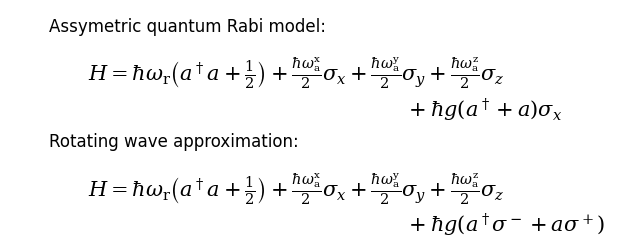

In [2]:
restls = rtls.ResonatorTLS()
fig = restls.show_formulas()

## Symmetric quantum Rabi model

In [6]:
wr = 5.0
wa_x = 0.0
wa_y = 0.0
wa_z = 4.0
g = 100e-3
RWA = False
Nr = 50

restls.set_parameters(wr=wr, wa_x=wa_x, wa_y=wa_y, wa_z=wa_z, g=g, RWA=RWA, Nr=Nr)
print(restls.__repr__())

wr = 5.0000e+00
wa = 4.0000e+00
wa_x = 0.0000e+00
wa_y = 0.0000e+00
wa_z = 4.0000e+00
g = 1.0000e-01
RWA = False



In [7]:
restls.diagonalize_hamiltonian()
restls.substract_groundstate_energy()
print(restls.E[:5])

[ 0.          3.99118983  5.00880995  8.98253153 10.01746781]


### TLS frequency sweep
- the program is designed for 1D sweeps of the system parameters

In [11]:
restls.sweep_parameter(np.linspace(4.0, 6.0, 201), "wa_z")
restls.substract_groundstate_energy_sweep()

Maximum plotted energy: 49.90083175262752


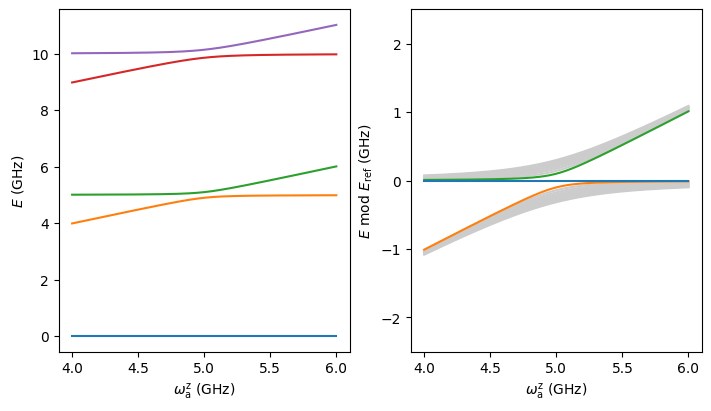

In [12]:
fig = plt.figure(figsize=(7, 4), constrained_layout=True)

ax = fig.add_subplot(121)
restls.plot_energy_sweep(ax, np.arange(5))
ax.set_xlabel(r"$\omega_\mathrm{a}^\mathrm{z}$ (GHz)")

ax = fig.add_subplot(122)

E_max = restls.plot_energy_sweep_wrapped(ax, 3, 20, wr)
print("Maximum plotted energy:", E_max)

ax.set_xlabel(r"$\omega_\mathrm{a}^\mathrm{z}$ (GHz)")

plt.show()

### Sorting energies
- when the rotating wave approximation is acitvated the sorting is trivial and is not performed
  via the TLS dipole moments

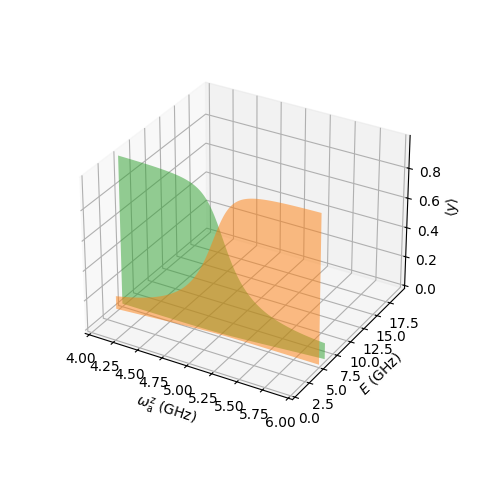

In [14]:
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(projection="3d")

# this shows how the resonator states can be identified
restls.plot_res_dipole_to_various_states_sweep(ax, 0, np.arange(8), dipole="y")

ax.set_box_aspect(aspect=None, zoom=0.8)

ax.set_xlabel(r"$\omega_\mathrm{a}^\mathrm{z}$ (GHz)", labelpad=8)

plt.show()

In [15]:
# The parameter dE is the allowed frequency variation of the resonator photons when climbing up the excitation ladder.
# A large value for dE slows down the sorting as more resonator charge dipole moments to all the states within dE have to be calculated.
# If no next state is found within dE, E_trust is set to the current state energy
# When the rotating wave approximation is applied dE is irrelevant.

dE = 0.5
restls.associate_levels_sweep(dE)
print("Successfully sorted up to {:.2f} GHz".format(restls.E_trust))

Successfully sorted up to 244.03 GHz


Maximum TLS state plotted: 1
Maximum resonator state plotted: 5
Maximum eigenstate plotted: 12
Maximum plotted energy: 31.061623531211122


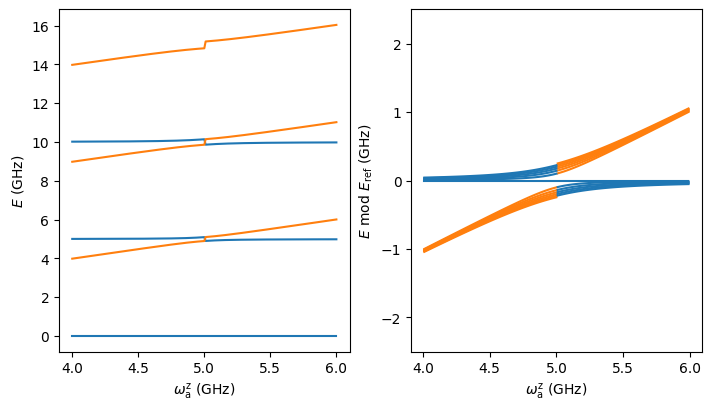

In [16]:
fig = plt.figure(figsize=(7, 4), constrained_layout=True)
ax = fig.add_subplot(121)

restls.plot_sorted_energy_sweep(ax, np.arange(2), np.arange(3))
ax.set_xlabel(r"$\omega_\mathrm{a}^\mathrm{z}$ (GHz)")


ax = fig.add_subplot(122)
nq_max, nr_max, n_max, E_max = restls.plot_sorted_energy_sweep_wrapped(ax, wr, na_max=1, nr_max=5, n=50, gap=True)
print("Maximum TLS state plotted:", nq_max)
print("Maximum resonator state plotted:",nr_max)
print("Maximum eigenstate plotted:", n_max)
print("Maximum plotted energy:", E_max)

ax.set_xlabel(r"$\omega_\mathrm{a}^\mathrm{z}$ (GHz)")

plt.show()

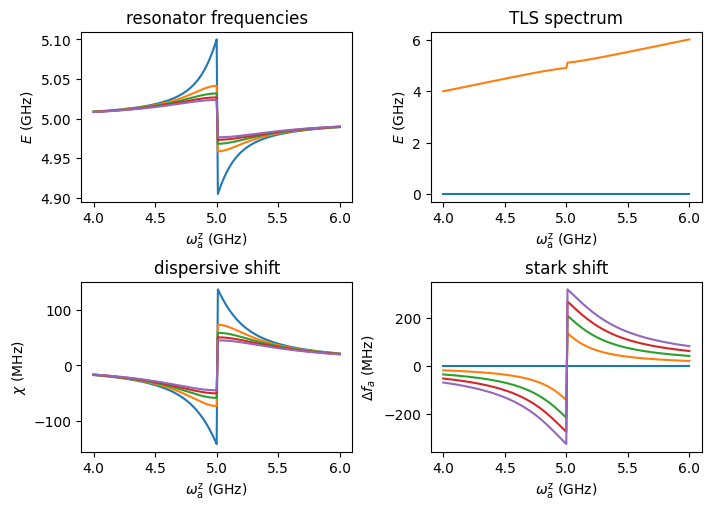

In [17]:
fig = plt.figure(figsize=(7, 5), constrained_layout=True)
ax = fig.add_subplot(221)

restls.derive_spectrum_properties_sweep()

ax.set_title("resonator frequencies")
restls.plot_resonator_transitions_sweep(ax, np.arange(1), np.arange(5))  # resonator frequency with TLS in ground state
ax.set_xlabel(r"$\omega_\mathrm{a}^\mathrm{z}$ (GHz)")
ax.set_ylabel(r"$E$ (GHz)")

ax = fig.add_subplot(222)
ax.set_title("TLS spectrum")
restls.plot_spectrum_sweep(ax, np.arange(2), np.arange(1))  # ground and excited state and resonator in ground state
ax.set_xlabel(r"$\omega_\mathrm{a}^\mathrm{z}$ (GHz)")
ax.set_ylabel(r"$E$ (GHz)")

ax = fig.add_subplot(223)
ax.set_title("dispersive shift")
restls.plot_chi_sweep(ax, [1], np.arange(5))  # dispersive shift of the excited state with respect to the ground state
ax.set_xlabel(r"$\omega_\mathrm{a}^\mathrm{z}$ (GHz)")
ax.set_ylabel(r"$\chi$ (MHz)")

ax = fig.add_subplot(224)
ax.set_title("stark shift")
restls.plot_stark_shift_sweep(ax, [1], np.arange(5))  # TLS frequency shift
ax.set_xlabel(r"$\omega_\mathrm{a}^\mathrm{z}$ (GHz)")
ax.set_ylabel(r"$\Delta f_a$ (MHz)")

plt.show()

### Sweep of the coupling

In [26]:
wa_z = 4.0
wr = 5.0
Nr = 100

restls.set_parameters(wr=wr, wa_x=0.0, wa_y=0.0, wa_z=wa_z, g=g, RWA=False, Nr=Nr)
restls.sweep_parameter(np.linspace(0.0, 5.0, 251)[1::], "g")
restls.substract_groundstate_energy_sweep()

restls.associate_levels_sweep(3.0)
print(restls.E_trust)

452.0164705527353


Maximum TLS state plotted: 1
Maximum resonator state plotted: 8
Maximum eigenstate plotted: 17
Maximum plotted energy: 43.99681031350659


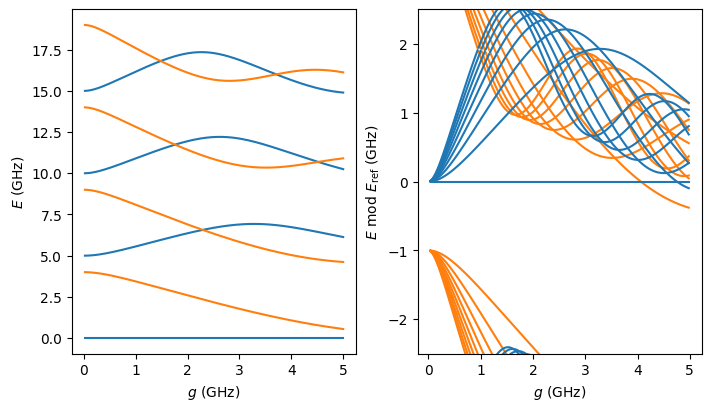

In [27]:
fig = plt.figure(figsize=(7, 4), constrained_layout=True)
ax = fig.add_subplot(121)

restls.plot_sorted_energy_sweep(ax, np.arange(2), np.arange(4))
ax.set_xlabel(r"$g$ (GHz)")

ax = fig.add_subplot(122)
nq_max, nr_max, n_max, E_max = restls.plot_sorted_energy_sweep_wrapped(ax, wr, na_max=1, nr_max=8, n=50, gap=True)
print("Maximum TLS state plotted:", nq_max)
print("Maximum resonator state plotted:",nr_max)
print("Maximum eigenstate plotted:", n_max)
print("Maximum plotted energy:", E_max)

ax.set_xlabel(r"$g$ (GHz)")

plt.show()

## Assymmetric quantum Rabi model

In [33]:
wr = 5.0
wa_x = 2.0
wa_y = 0.0
g = 100e-3
RWA = False
Nr = 50

restls.set_parameters(wr=wr, wa_x=wa_x, wa_y=wa_y, wa_z=wa_z, g=g, RWA=RWA, Nr=Nr)
restls.sweep_parameter(np.linspace(-6.0, 6.0, 301), "wa_z")
restls.substract_groundstate_energy_sweep()

dE = 0.5
restls.associate_levels_sweep(dE)
print("Successfully sorted up to {:.2f} GHz".format(restls.E_trust))

Successfully sorted up to 244.21 GHz


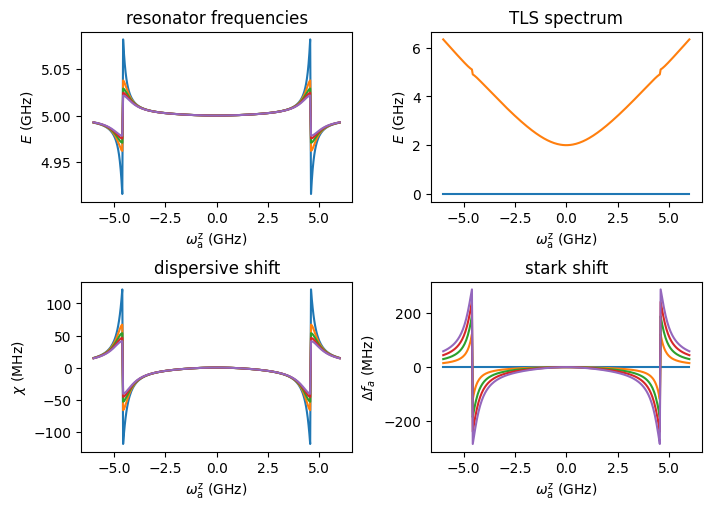

In [34]:
fig = plt.figure(figsize=(7, 5), constrained_layout=True)
ax = fig.add_subplot(221)

restls.derive_spectrum_properties_sweep()

ax.set_title("resonator frequencies")
restls.plot_resonator_transitions_sweep(ax, np.arange(1), np.arange(5))  # resonator frequency with TLS in ground state
ax.set_xlabel(r"$\omega_\mathrm{a}^\mathrm{z}$ (GHz)")
ax.set_ylabel(r"$E$ (GHz)")

ax = fig.add_subplot(222)
ax.set_title("TLS spectrum")
restls.plot_spectrum_sweep(ax, np.arange(2), np.arange(1))  # ground and excited state and resonator in ground state
ax.set_xlabel(r"$\omega_\mathrm{a}^\mathrm{z}$ (GHz)")
ax.set_ylabel(r"$E$ (GHz)")

ax = fig.add_subplot(223)
ax.set_title("dispersive shift")
restls.plot_chi_sweep(ax, [1], np.arange(5))  # dispersive shift of the excited state with respect to the ground state
ax.set_xlabel(r"$\omega_\mathrm{a}^\mathrm{z}$ (GHz)")
ax.set_ylabel(r"$\chi$ (MHz)")

ax = fig.add_subplot(224)
ax.set_title("stark shift")
restls.plot_stark_shift_sweep(ax, [1], np.arange(5))  # TLS frequency shift
ax.set_xlabel(r"$\omega_\mathrm{a}^\mathrm{z}$ (GHz)")
ax.set_ylabel(r"$\Delta f_a$ (MHz)")

plt.show()

## Effect of the rotating wave approximation

In [30]:
wa_z = 1.0
wr = 5.0
g = 100e-3

restls_RWA = rtls.ResonatorTLS()
restls_RWA.set_parameters(wr=wr, wa_x=0.0, wa_y=0.0, wa_z=wa_z, g=g, RWA=True, Nr=200)
restls_RWA.diagonalize_hamiltonian()

restls = rtls.ResonatorTLS()
restls.set_parameters(wr=wr, wa_x=0.0, wa_y=0.0, wa_z=wa_z, g=g, RWA=False, Nr=200)  # this runs for 1min
restls.diagonalize_hamiltonian()

In [31]:
restls_RWA.associate_levels()
restls.associate_levels(dE=0.5)
print(restls.E_trust)

restls_RWA.derive_spectrum_properties()
restls.derive_spectrum_properties()

inf


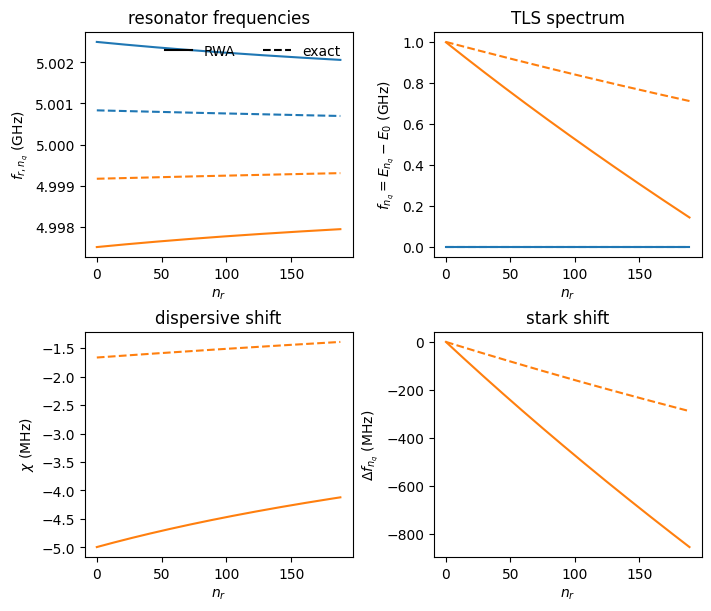

In [32]:
fig = plt.figure(figsize=(7, 6), constrained_layout=True) 

# the last state/states may not correctly be sorted/converged in case no RWA is applied
dnr = 10

ax = fig.add_subplot(221)
ax.set_title("resonator frequencies")
ax.plot(restls_RWA.resonator_transitions[0, :-dnr], color="C0")  # resonator frequency with TLS in ground state
ax.plot(restls_RWA.resonator_transitions[1, :-dnr], color="C1",)  # resonator frequency with TLS in excited state
ax.plot(restls.resonator_transitions[0, :-dnr], color="C0", ls="--")  # resonator frequency with TLS in ground state
ax.plot(restls.resonator_transitions[1, :-dnr], color="C1", ls="--")  # resonator frequency with TLS in excited state

ax.plot([], [], color="k", ls="-", label="RWA")
ax.plot([], [], color="k", ls="--", label="exact")
ax.legend(loc=1, ncol=2, frameon=False)

ax.set_xlabel("$n_r$")
ax.set_ylabel("$f_{r, n_q}$ (GHz)")

ax = fig.add_subplot(222)
ax.set_title("TLS spectrum")
ax.plot(restls_RWA.atom_spectrum[0, :-dnr], color="C0")  # ground state
ax.plot(restls_RWA.atom_spectrum[1, :-dnr], color="C1")  # first excited state
ax.plot(restls.atom_spectrum[0, :-dnr], color="C0", ls="--")  # ground state
ax.plot(restls.atom_spectrum[1, :-dnr], color="C1", ls="--")  # first excited state
ax.set_xlabel("$n_r$")
ax.set_ylabel("$f_{n_q} = E_{n_q} - E_0$ (GHz)")

ax = fig.add_subplot(223)
ax.set_title("dispersive shift")
ax.plot(1e3 * restls_RWA.chi[1, :-dnr], color="C1")   # first excited state
ax.plot(1e3 * restls.chi[1, :-dnr], color="C1", ls="--")   # first excited state
ax.set_xlabel("$n_r$")
ax.set_ylabel(r"$\chi$ (MHz)")

ax = fig.add_subplot(224)
ax.set_title("stark shift")
ax.plot(1e3 * restls_RWA.atom_stark_shift[1, :-dnr], color="C1") 
ax.plot(1e3 * restls.atom_stark_shift[1, :-dnr], color="C1", ls="--") 
ax.set_xlabel("$n_r$")
ax.set_ylabel(r"$\Delta f_{n_q}$ (MHz)")

plt.show()

## More...
- get creative with the code and adapt it to your needs